## 登峰杯模型测试
把数据连续化的尝试不算太成功，那么进行向量化试试。

In [1]:
# Import Libs
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import Callback, History
from keras.utils import to_categorical as toc 
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Visualize
def displayHis(history):
    total_points = 1000
    losses = history.history['loss']
    acc = history.history['acc']
    x = range(0, total_points)
    fac = np.floor(len(losses) / total_points)
    racc = [ ]
    for i in range(0, len(acc)):
        if i % fac == 0:
            racc.append(acc[i])
    rlosses = [ ]
    for i in range(0, len(losses)):
        if i % fac == 0:
            rlosses.append(losses[i])
    
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(x, racc)
    axarr[0].set_title('Accuracy')
    axarr[1].plot(x, rlosses)
    axarr[1].set_title('Loss')
history = History()

In [3]:
# 对第一名，第二名，第三名，以及出局者分别生成有意义的数据，来获得理想的结果
# Generate Data
data = [ ]
labels = [ ]
# Winners
for _ in range(0, 250):
    item = [ ] # Rate, Coins, Score, Length, Rough
    item.append(np.random.random()*0.25) # Rate
    item.append(np.random.random()*0.5+0.5) # Coins
    item.append(np.random.random()*0.5+0.5) # Score
    item.append(np.random.random()*0.5) # Length
    item.append(np.random.random()*0.25) # Rough
    data.append(item)
    labels.append(0)
    
# Second
for _ in range(0, 250):
    item = [ ] # Rate, Coins, Score, Length, Rough
    item.append(np.random.random()*0.5) # Rate
    item.append(np.random.random()*0.5+0.5) # Coins
    item.append(np.random.random()*0.5+0.5) # Score
    item.append(np.random.random()*0.5) # Length
    item.append(np.random.random()*0.25) # Rough
    data.append(item)
    labels.append(1)

# Third
for _ in range(0, 250):
    item = [ ] # Rate, Coins, Score, Length, Rough
    item.append(np.random.random()*0.25+0.75) # Rate
    item.append(np.random.random()) # Coins
    item.append(np.random.random()) # Score
    item.append(np.random.random()) # Length
    item.append(np.random.random()) # Rough
    data.append(item)
    labels.append(2)
    
# Out
for _ in range(0, 250):
    item = [ ] # Rate, Coins, Score, Length, Rough
    item.append(np.random.random()*0.1+0.9) # Rate
    item.append(np.random.random()*0.3) # Coins
    item.append(np.random.random()*0.3) # Score
    item.append(np.random.random()) # Length
    item.append(np.random.random()*0.5+0.5) # Rough
    data.append(item)
    labels.append(3)

one_hot_labels = toc(labels, num_classes=4)
print one_hot_labels

[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]]


In [4]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(data, one_hot_labels, epochs=5000, batch_size=32, verbose=0, callbacks=[history])

0.995


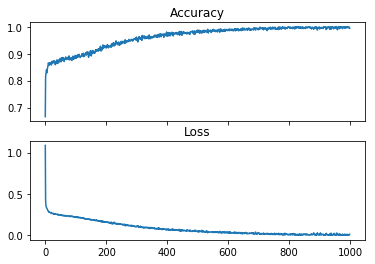

In [6]:
%matplotlib inline
print history.history['acc'][len(history.history['acc'])-1]
displayHis(history)

In [15]:
model.predict([[0, 0.8, 0.8, 0.2, 0.2], [0.8, 0.8, 0.8, 0.2, 0.2]])

array([[  1.00000000e+00,   6.11890920e-12,   0.00000000e+00,
          8.90209734e-30],
       [  0.00000000e+00,   3.78532685e-35,   1.00000000e+00,
          0.00000000e+00]], dtype=float32)

可以看到，犯规概率为0.0与犯规概率为0.8的司机差距明显。模型对不犯规司机的预测是第一名，而对犯规司机的预测是第三名。